<a href="https://colab.research.google.com/github/lorenzilipe/dsc210-data-mining/blob/josh/sota_model_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
! pip install ray
! pip install recbole
! pip install kmeans_pytorch

In [147]:
from recbole.quick_start import load_data_and_model
from recbole.trainer import Trainer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Path to trained models
# Need to upload .pth files to Colab
bert4rec_path = '/content/BERT4Rec.pth'
neuMF_path = '/content/NeuMF.pth'

In [109]:
# Load BERT4Rec Model
bert4rec_config, bert4rec_model, bert4rec_dataset, bert4rec_train_data, bert4rec_valid_data, bert4rec_test_data = load_data_and_model(
    model_file=bert4rec_path
)

bert4rec_trainer = Trainer(bert4rec_config, bert4rec_model)

# Get metrics
bert4rec_metrics = bert4rec_trainer.evaluate(bert4rec_test_data, model_file=bert4rec_path)

/usr/local/lib/python3.10/dist-packages/recbole/quick_start/quick_start.py:250: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_file)
/usr/local/

In [114]:
bert4rec_metrics

OrderedDict([('recall@10', 0.2406),
             ('mrr@10', 0.0951),
             ('ndcg@10', 0.129),
             ('hit@10', 0.2406),
             ('precision@10', 0.0241)])

In [115]:
# Load NeuMF Model
neuMF_config, neuMF_model, neuMF_dataset, neuMF_train_data, neuMF_valid_data, neuMF_test_data = load_data_and_model(
    model_file=neuMF_path
)

neuMF_trainer = Trainer(neuMF_config, neuMF_model)

# Get metrics
neuMF_metrics = neuMF_trainer.evaluate(neuMF_test_data, model_file=neuMF_path)

/usr/local/lib/python3.10/dist-packages/recbole/quick_start/quick_start.py:250: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_file)
/usr/local/

In [130]:
neuMF_metrics

OrderedDict([('recall@10', 0.1642),
             ('mrr@10', 0.4251),
             ('ndcg@10', 0.2515),
             ('hit@10', 0.745),
             ('precision@10', 0.2018)])

In [156]:
bert4rec_recall, bert4rec_precision = bert4rec_metrics['recall@10'], bert4rec_metrics['precision@10']
neuMF_recall, neuMF_precision = neuMF_metrics['recall@10'], neuMF_metrics['precision@10']
svd_recall, svd_precision = [0.025564, 0.073981]

data = {
    'Metrics': ['Precision', 'Recall', 'Precision', 'Recall', 'Precision', 'Recall'],
    'Models': ['SVD', 'NeuMF', 'BERT4Rec', 'SVD', 'NeuMF', 'BERT4Rec'],
    'Value': [svd_precision, neuMF_precision, bert4rec_precision, svd_recall, neuMF_recall, bert4rec_recall]
}

# Create a DataFrame
df = pd.DataFrame(data)

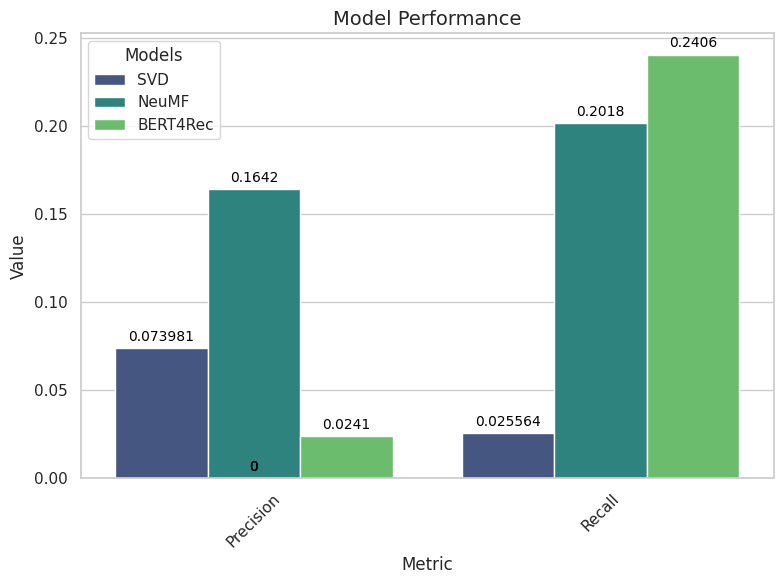

In [ ]:
sns.set(style="whitegrid")

# Create the grouped barplot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Metrics', y='Value', hue='Models', data=df, palette='viridis')

# Add labels and title
bar_plot.set_xlabel('Metric', fontsize=12)
bar_plot.set_ylabel('Value', fontsize=12)
bar_plot.set_title('Model Performance', fontsize=14)

plt.xticks(rotation=45)

# Add value annotations on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=10, color='black',
                      xytext=(0, 8), textcoords='offset points')

# Show the plot
plt.tight_layout()
#plt.savefig('model_metrics.png', dpi=300)
plt.show()

In [ ]:
# Sample Prediction
